<a href="https://www.kaggle.com/code/jacker01/most-streamed-spotify-songs?scriptVersionId=145747855" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-spotify-songs-2023/spotify-2023.csv


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',100)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.0f}'.format

In [3]:
data = pd.read_csv('/kaggle/input/top-spotify-songs-2023/spotify-2023.csv', encoding='latin1')
spotify=pd.DataFrame(data)
spotify.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [4]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
columns =['artist_count','in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm','danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%','released_year'] 
spotify[columns] = spotify[columns].apply(pd.to_numeric, errors='coerce')

In [6]:
spotify.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [7]:
spotify.shape

(953, 24)

# Lets see what the most streamed songs are

In [8]:
most_streamed_songs = spotify[['artist(s)_name','track_name','streams']].nlargest(10,['streams']) 
display(most_streamed_songs)

,artist(s)_name,track_name,streams
55,The Weeknd,Blinding Lights,3703895074
179,Ed Sheeran,Shape of You,3562543890
86,Lewis Capaldi,Someone You Loved,2887241814
620,Tones and I,Dance Monkey,2864791672
41,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,2808096550
162,"Drake, WizKid, Kyla",One Dance,2713922350
84,"Justin Bieber, The Kid Laroi",STAY (with Justin Bieber),2665343922
140,Imagine Dragons,Believer,2594040133
725,"The Chainsmokers, Halsey",Closer,2591224264
48,"The Weeknd, Daft Punk",Starboy,2565529693


**Blinding Lights** with **3.7B+** streams is the most streamed.

The weekednd has two songs in the top ten most streamed

as the spiderman fan i am sunflower>>>> alas we can't argue with data.

# The most streamed artists

In [9]:
most_streamed_artists = spotify.groupby('artist(s)_name')[['streams']].sum().nlargest(10, 'streams')
display(most_streamed_artists)

,streams
artist(s)_name,
The Weeknd,14185552870
Taylor Swift,14053658300
Ed Sheeran,13908947204
Harry Styles,11608645649
Bad Bunny,9997799607
Olivia Rodrigo,7442148916
Eminem,6183805596
Bruno Mars,5846920599
Arctic Monkeys,5569806731


The top ten artists pretty much matches the top ten songs except:
* Someone you loved is the third most streamed song but Lewis Capaldi doesn't showup on top ten.most streamed artists.
* Harry Styles,Bad bunny,Eminem,Olivia Rodrigo,Bruno Mars, and Taylor Swift are all in the top ten most streamed artists but have no song in the top ten most streamed songs.


# How many songs does each artist have on the most streamed songs list

In [10]:
total_appearances = len(spotify)
artist_appearances_count = spotify['artist(s)_name'].value_counts().reset_index()
artist_appearances_count.columns = ['artist(s)_name', 'count']
artist_appearances_count['percentage_of_total'] = (artist_appearances_count['count'] / total_appearances) * 100
most_appeared_artists_percentage = artist_appearances_count.nlargest(10, 'percentage_of_total')
display(most_appeared_artists_percentage)

,artist(s)_name,count,percentage_of_total
0,Taylor Swift,34,4
1,The Weeknd,22,2
2,Bad Bunny,19,2
3,SZA,19,2
4,Harry Styles,17,2
5,Kendrick Lamar,12,1
6,Morgan Wallen,11,1
7,Ed Sheeran,9,1
8,BTS,8,1
9,Feid,8,1


We can see 4% of songs on this list were released by Taylor Swift, with The Weekend coming in second at 2%

# Let's look at how often each artist shows up in playlists (top ten)

In [11]:
most_streamed_artists = spotify.groupby('artist(s)_name')[['in_spotify_playlists','in_apple_playlists','in_deezer_playlists']].sum().nlargest(10, ['in_spotify_playlists','in_apple_playlists','in_deezer_playlists'])
display(most_streamed_artists)

,in_spotify_playlists,in_apple_playlists,in_deezer_playlists
artist(s)_name,,,
The Weeknd,144053,1677,2138
Taylor Swift,132974,1796,1708
Ed Sheeran,128758,1448,1702
Harry Styles,110026,1741,2483
Eminem,87331,475,0
Arctic Monkeys,84016,241,1170
Coldplay,75716,381,805
Avicii,68241,407,0
"Dr. Dre, Snoop Dogg",65728,283,0


# Now we see what makes the best songs the best songs

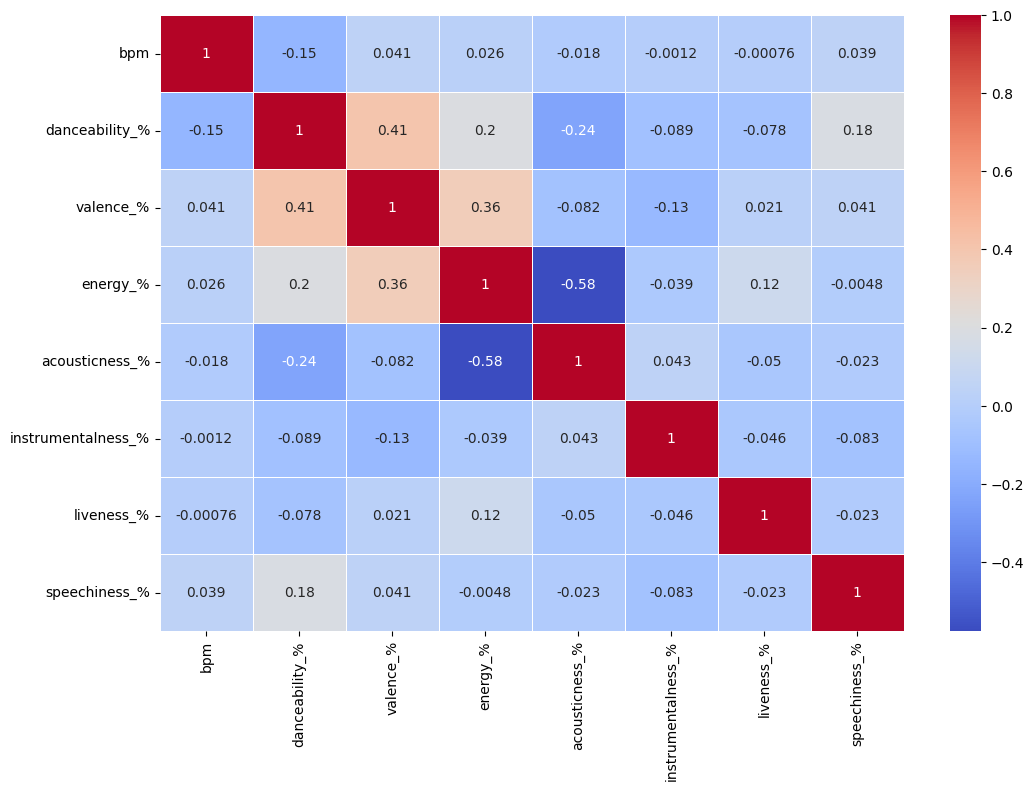

In [12]:
cols=['bpm','danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
correlation_matrix = spotify[cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

The majority of the columns have a weak negative correlation with the number of streams, indicating a mild inverse relationship. However, it's important to keep in mind that the practical significance of these weak correlations may be limited.

* Danceable Songs: There is a moderate positive correlation between danceability and valence. This suggests that when aiming to create a danceable song, it's likely to have a more positive or cheerful mood (valence).
 
* Energetic Songs: You found a moderate negative correlation between acousticness and energy. This implies that songs with lower acousticness (less acoustic, more electronic) tend to have higher energy levels. Therefore, if you're looking to create a more energetic song, reducing acoustic elements and incorporating more electronic or produced elements may be effective.

In [13]:
spotify['stream_milions'] = spotify['streams']/1000000

# What is the magic key for when making a song

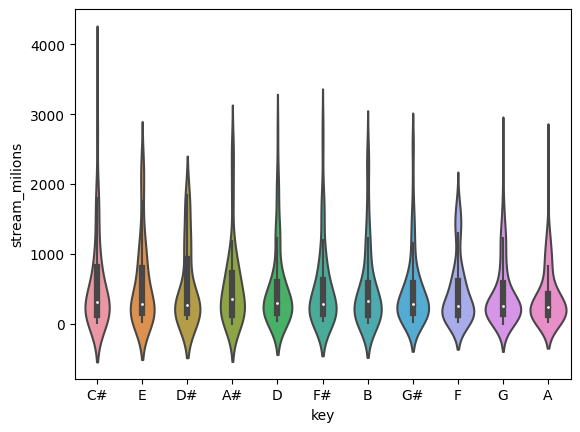

In [14]:
average_order = spotify.groupby('key')['streams'].mean().sort_values(ascending=False).index.tolist()
sns.violinplot(x='key',y='stream_milions',data=spotify,figsize=(20,10),order=average_order)
plt.show()

We can see songs made using C# have higher streams and using A have lesser streams.

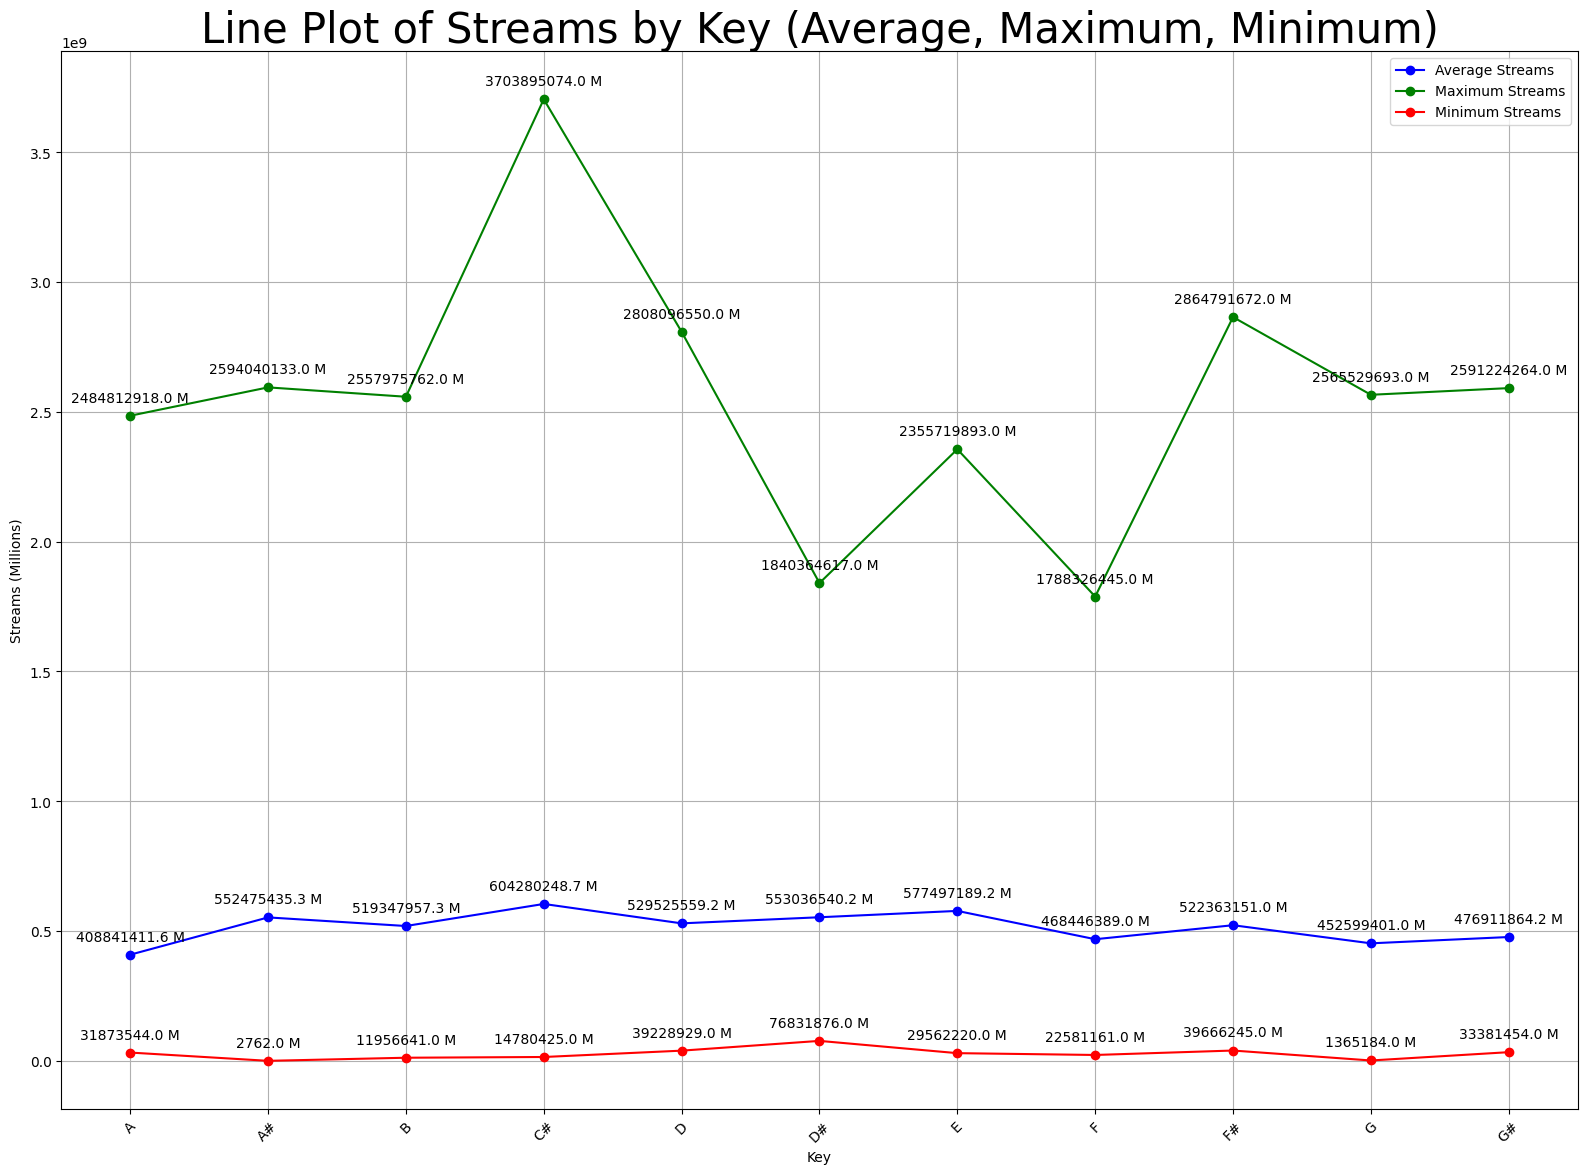

In [15]:
import matplotlib.pyplot as plt

# Group by 'key' and calculate average, maximum, and minimum streams
avg_streams = spotify.groupby('key')['streams'].mean()
max_streams = spotify.groupby('key')['streams'].max()
min_streams = spotify.groupby('key')['streams'].min()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(16, 12))

# Plot average streams as a line plot with data labels and blue color
ax.plot(avg_streams.index, avg_streams.values, marker='o', color='blue', label='Average Streams')
for x, y in zip(avg_streams.index, avg_streams.values):
    ax.annotate(f'{y:.1f} M', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Plot maximum streams as a line plot with data labels and green color
ax.plot(max_streams.index, max_streams.values, marker='o', color='green', label='Maximum Streams')
for x, y in zip(max_streams.index, max_streams.values):
    ax.annotate(f'{y:.1f} M', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Plot minimum streams as a line plot with data labels and red color
ax.plot(min_streams.index, min_streams.values, marker='o', color='red', label='Minimum Streams')
for x, y in zip(min_streams.index, min_streams.values):
    ax.annotate(f'{y:.1f} M', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Set labels and title
ax.set_xlabel('Key')
ax.set_ylabel('Streams (Millions)')
ax.set_title('Line Plot of Streams by Key (Average, Maximum, Minimum)',fontsize=30)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a grid for better visualization
plt.grid(True)

# Ensure a tight layout
plt.tight_layout()

# Add a legend
ax.legend()

# Show the plot
plt.show()


On average C#,E,D# seem to your best bet if you want to rake in those streams

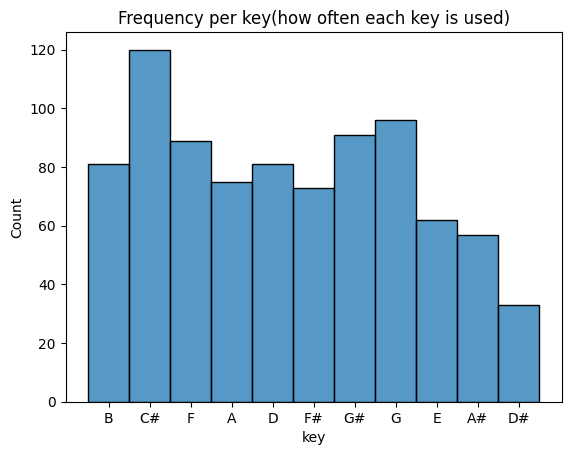

In [16]:
sns.histplot(data=spotify,x='key')
plt.title('Frequency per key(how often each key is used)')
plt.show()

We can see C# is the most frequent key used in songs on the list.

In [17]:
spotify_sorted = spotify.sort_values(by='streams', ascending=False)

# Split the DataFrame into top 10, top 50, top 100, and top 800
top_10 = spotify_sorted.head(10)
top_50 = spotify_sorted.head(50)
top_100 = spotify_sorted.head(100)
top_500 = spotify_sorted.head(500)
top_950 = spotify_sorted.head(950)


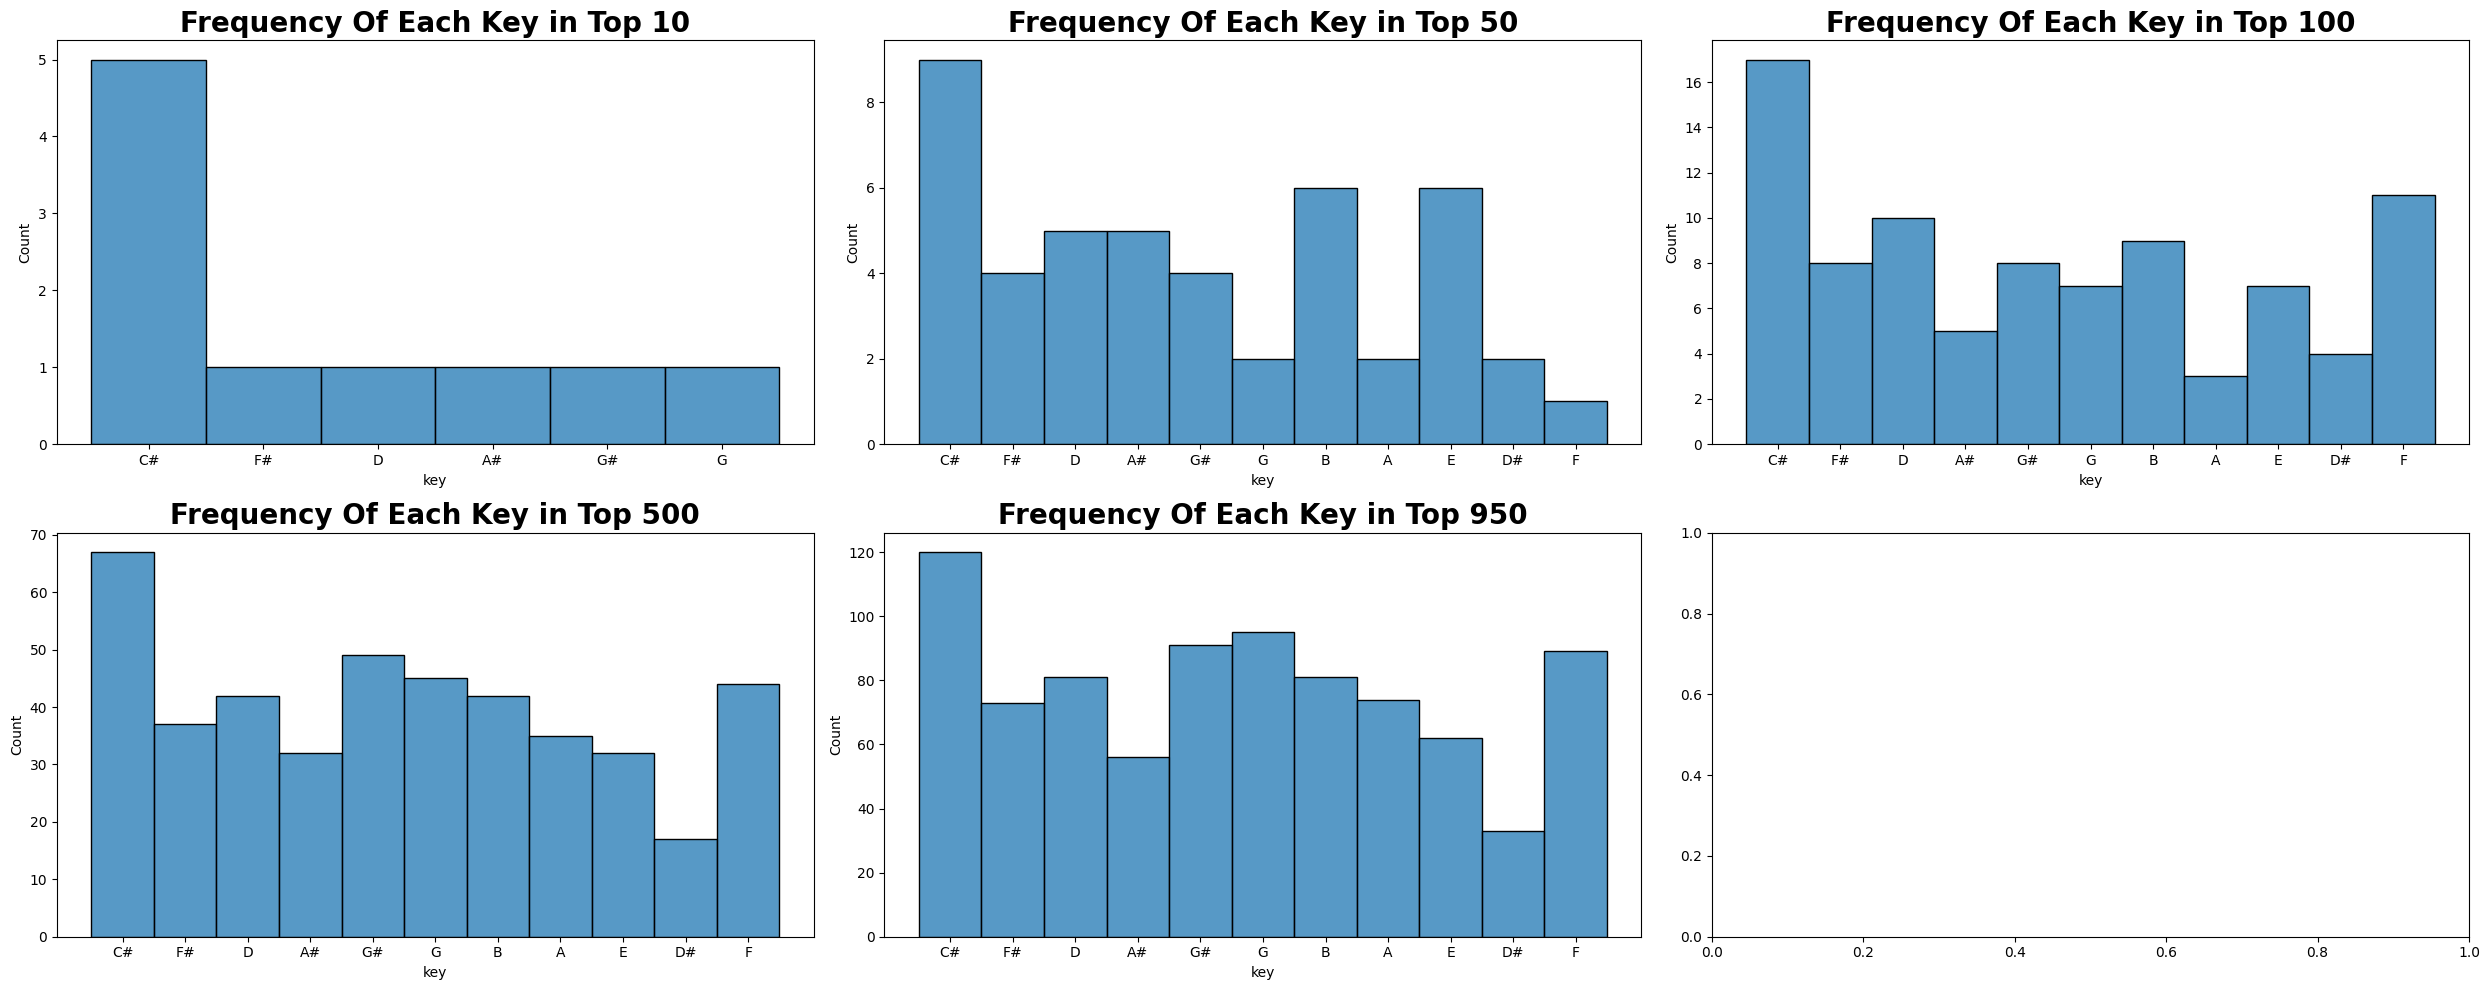

In [18]:
subsets = [top_10, top_50, top_100, top_500, top_950]
titles = ['Top 10', 'Top 50', 'Top 100', 'Top 500', 'Top 950']
fig, axes = plt.subplots(2, 3, figsize=(25, 10))
for i, (subset, title) in enumerate(zip(subsets, titles)):
    ax = axes[i // 3, i % 3]
    sns.histplot(data=subset, x='key', ax=ax)
    ax.set_title(f'Frequency Of Each Key in {title}',fontsize=20,fontweight='bold')
plt.tight_layout()
plt.show()

# Next we see what mode is the most frequent on the list

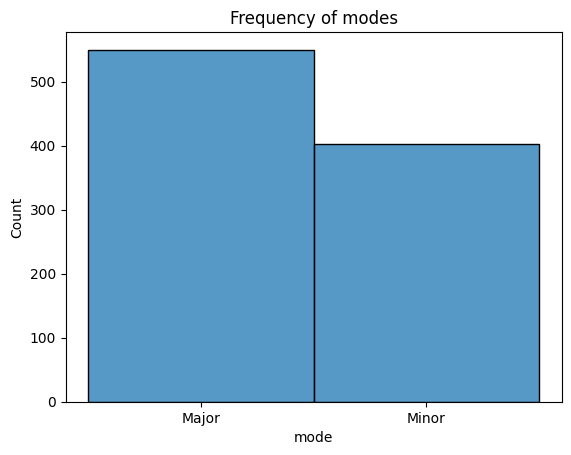

In [19]:
sns.histplot(data=spotify, x='mode', bins=2)
plt.title('Frequency of modes')
plt.show()

more songs in the most streamed songs are major keys, so happier, upbeat songs tend to get more streams than the darker or sadder ones (minor key)

# What bpm range is best for getting streams

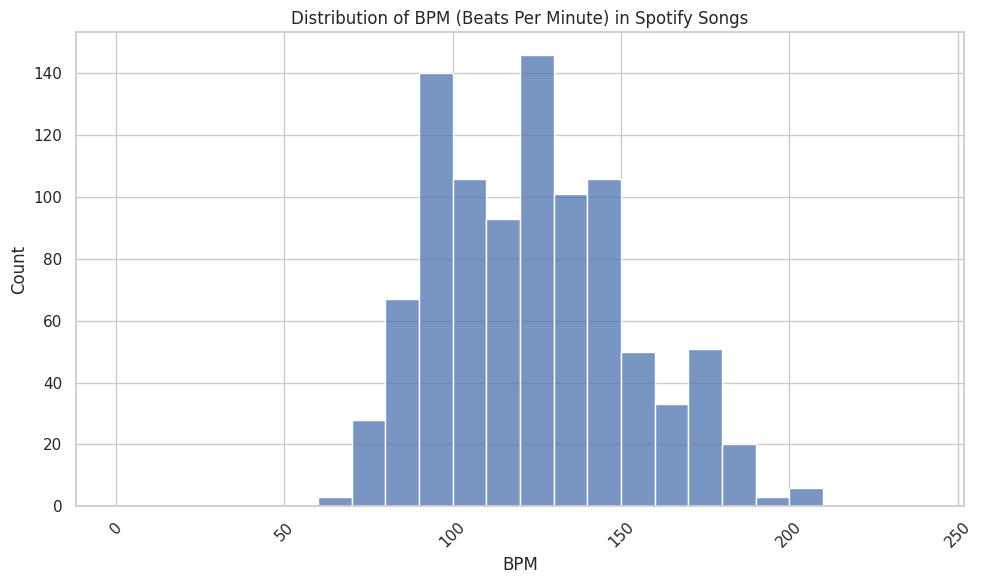

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bins = list(range(0, 250, 10))

# Create a histogram for BPM
sns.histplot(data=spotify, x='bpm', bins=bins, kde=False)

# Customize the plot
plt.title('Distribution of BPM (Beats Per Minute) in Spotify Songs')
plt.xlabel('BPM')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

The sweet spot for bpm is between 90 - 150

To be more specific bpm between 120-130 are more frequent on the most streamed songs followed by 90-100

/tmp/ipykernel_20/127241983.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=streams_by_bpm, x='bpm', y='streams', ci=None)


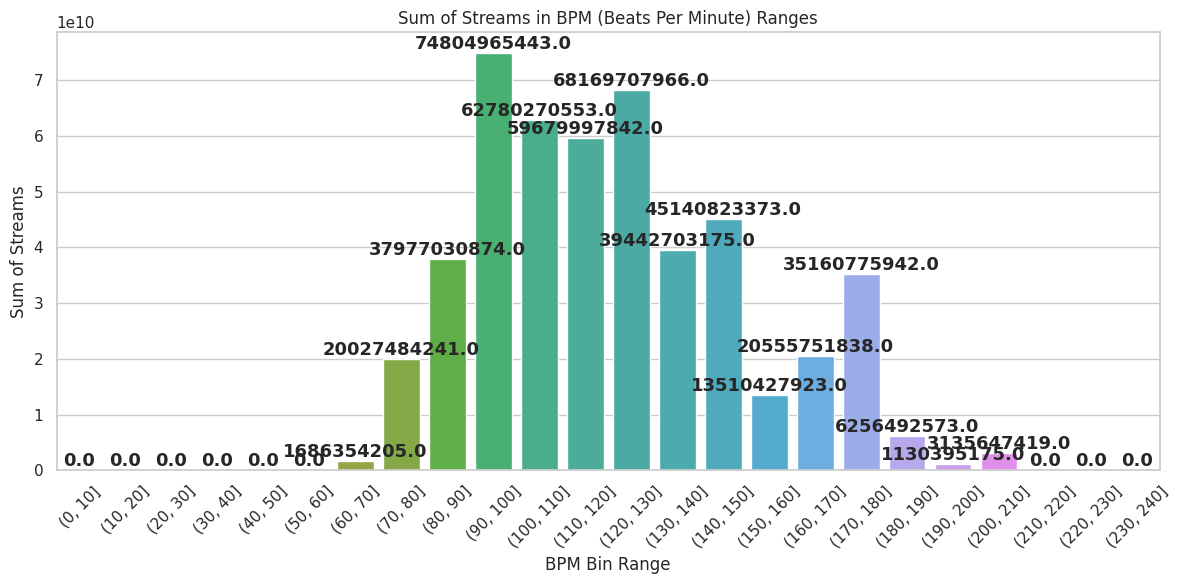

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
bins = list(range(0, 250, 10))
bpm_bins = pd.cut(spotify['bpm'], bins=bins)
streams_by_bpm = spotify.groupby(bpm_bins)['streams'].sum().reset_index()
ax = sns.barplot(data=streams_by_bpm, x='bpm', y='streams', ci=None)
for i, v in enumerate(streams_by_bpm['streams']):
    ax.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=13,fontweight='bold')
plt.title('Sum of Streams in BPM (Beats Per Minute) Ranges')
plt.xlabel('BPM Bin Range')
plt.ylabel('Sum of Streams')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

We can see the barplot using number of streams of songs within each bpm range and the frequency plot are pretty much identical so the reccomendations made earlier still stand.